In [73]:
!pip install openpyxl matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 1.1 MB/s eta 0:00:00a 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 1.4 MB/s eta 0:00:00a 0:00:01


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [43]:
np.random.seed(1)
n = 100
dates = pd.date_range(start='2050-01-01', periods=n, freq='D')
products = np.random.choice(['Tablet', 'Camera', 'Phone', 'Notebook'], n)
prices = np.random.uniform(50.0, 200.0, n).round(2)
quantities = np.random.randint(1, 15, n)

data = {
    'Date': dates,
    'Product': products,
    'Price': prices,
    'Quantity': quantities
}
df = pd.DataFrame(data)
df.head()

,Date,Product,Price,Quantity
0,2050-01-01,Camera,52.91,9
1,2050-01-02,Notebook,151.83,2
2,2050-01-03,Tablet,81.74,11
3,2050-01-04,Tablet,89.83,5
4,2050-01-05,Notebook,123.74,13


In [44]:
df.dtypes

Date        datetime64[ns]
Product             object
Price              float64
Quantity             int64
dtype: object

In [45]:
df.describe()

,Date,Price,Quantity
count,100,100.00000,100.000000
mean,2050-02-19 12:00:00,123.20450,7.240000
min,2050-01-01 00:00:00,50.43000,1.000000
25%,2050-01-25 18:00:00,75.58750,4.000000
50%,2050-02-19 12:00:00,131.87000,7.000000
75%,2050-03-16 06:00:00,162.20750,11.000000
max,2050-04-10 00:00:00,199.60000,14.000000
std,NaN,46.45348,3.921245


In [46]:
df.to_csv('random_sales.csv', index=False)

In [57]:
df = pd.read_csv('random_sales.csv', parse_dates=['Date'], date_format='%Y-%m-%d')
df.head()

,Date,Product,Price,Quantity
0,2050-01-01,Camera,52.91,9
1,2050-01-02,Notebook,151.83,2
2,2050-01-03,Tablet,81.74,11
3,2050-01-04,Tablet,89.83,5
4,2050-01-05,Notebook,123.74,13


In [58]:
df.dtypes

Date        datetime64[ns]
Product             object
Price              float64
Quantity             int64
dtype: object

In [62]:
df.to_excel('sales_data.xlsx')

In [63]:
df.to_json('sales_data.json')

In [65]:
df.describe().round(2)

,Date,Price,Quantity
count,100,100.00,100.00
mean,2050-02-19 12:00:00,123.20,7.24
min,2050-01-01 00:00:00,50.43,1.00
25%,2050-01-25 18:00:00,75.59,4.00
50%,2050-02-19 12:00:00,131.87,7.00
75%,2050-03-16 06:00:00,162.21,11.00
max,2050-04-10 00:00:00,199.60,14.00
std,NaN,46.45,3.92


In [68]:
df.values[:5]

array([[Timestamp('2050-01-01 00:00:00'), 'Camera', 52.91, 9],
       [Timestamp('2050-01-02 00:00:00'), 'Notebook', 151.83, 2],
       [Timestamp('2050-01-03 00:00:00'), 'Tablet', 81.74, 11],
       [Timestamp('2050-01-04 00:00:00'), 'Tablet', 89.83, 5],
       [Timestamp('2050-01-05 00:00:00'), 'Notebook', 123.74, 13]],
      dtype=object)

In [75]:
product_sales = df.groupby(by='Product')['Quantity'].sum()
product_sales

Product
Camera      218
Notebook    169
Phone       117
Tablet      220
Name: Quantity, dtype: int64

In [79]:
avg_prices = df.groupby(by='Product')['Price'].mean().round(2)
avg_prices

Product
Camera      109.57
Notebook    120.07
Phone       139.54
Tablet      129.60
Name: Price, dtype: float64

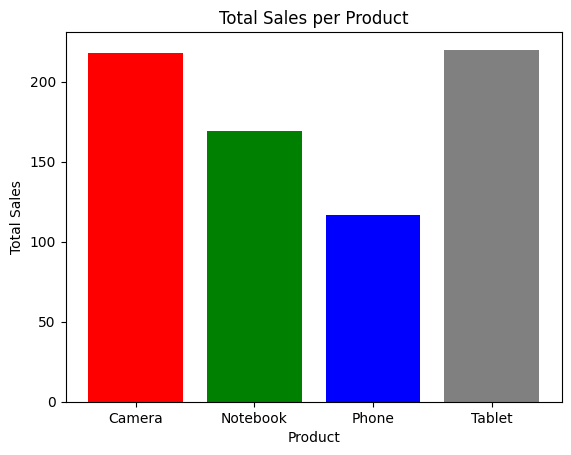

In [78]:
plt.bar(product_sales.index, product_sales.values, color=['red', 'green', 'blue', 'gray'])
plt.title('Total Sales per Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

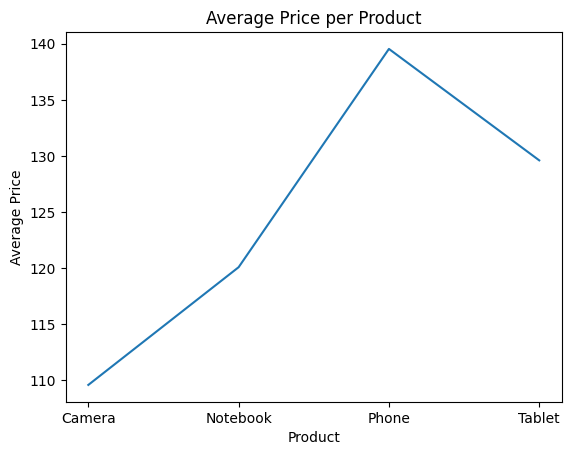

In [83]:
plt.plot(avg_prices.index, avg_prices.values)
plt.title('Average Price per Product')
plt.xlabel('Product')
plt.ylabel('Average Price')
plt.show()